# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libaries 
in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take a following approach :
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Defination

In a statment, 
> Given clincical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The orginal data comes from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

> We want to achive an accuracy up to 95 % at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

**Data Dictionary**

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [211]:
## Preparing the tools 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Store the graph.figure in the notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Models evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBClassifier

## Load the data

In [5]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data exploration (explotary data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with

1. What question you are trying to solve?
2. What kind of data do you have and how we treat different types?
3. What's missing from the data and how you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,change or remove to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '0 = No Disease,1 = Disease')

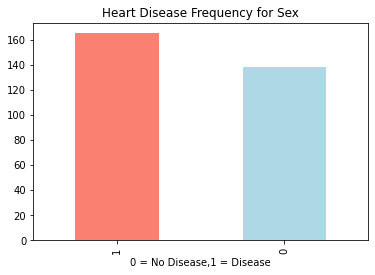

In [23]:
df["target"].value_counts().plot(kind="bar",color = ["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease,1 = Disease")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency acording to Sex

In [16]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


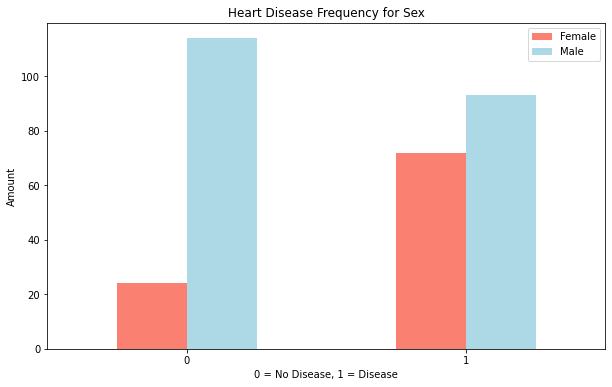

In [39]:
# Create a plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age and Max Heart Rated for Heart Disease 

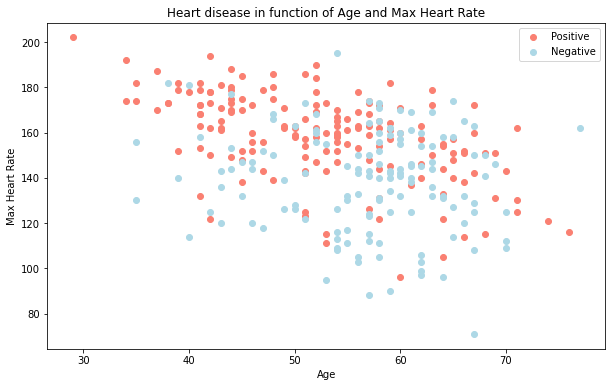

In [34]:
# Create another figure 

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon");

# Scatter with negative examples

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Positive","Negative"]);

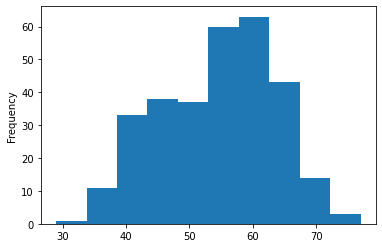

In [35]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease Frequency per chest pain type 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [37]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


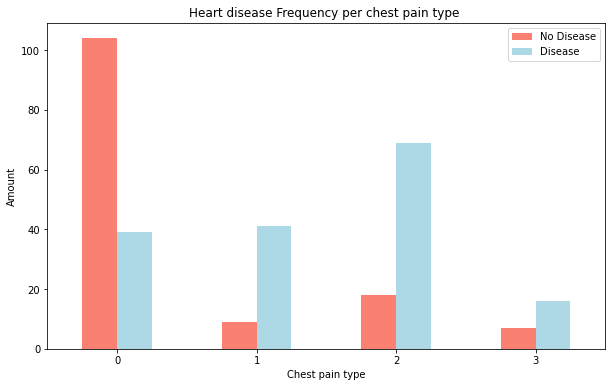

In [52]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10, 6),color=["salmon", "lightblue"])

plt.title("Heart disease Frequency per chest pain type ")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [54]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


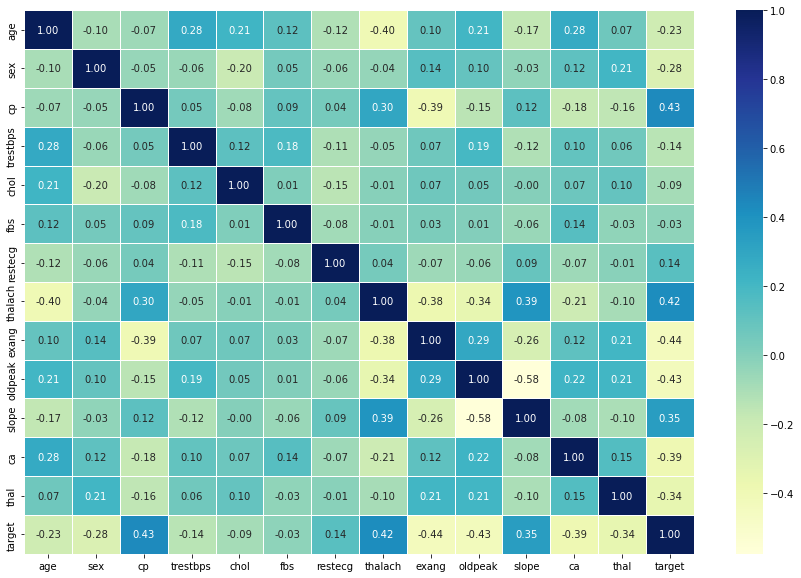

In [59]:
# Let's make correlation matrix a little pretier 
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## 5. Modelling

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Split the data
X = df.drop("target",axis=1)
y = df["target"]


In [62]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [166]:
np.random.seed(52)
# Split train test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [167]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


Now we have the train and test set, now we will create a model

We'll train it on the train set(find the pattern)

And we'll use it on the test set(use the pattern)

We'll try 4 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. RandomForestClassifier
4. XGBoost

In [175]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGboost": XGBClassifier()
}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    # Make random seed
    np.random.seed(52)
    # Make a dictionary to keep model scores
    model_scores={}
    # Loop through the models 
    for name, model in models.items(): 
        # Fit the model to data
        model.fit(X_train, y_train)
        
        # Evaluate the model and appends it score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [176]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/Users/macos/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.9016393442622951,
 'XGboost': 0.8524590163934426}

### Model comparison

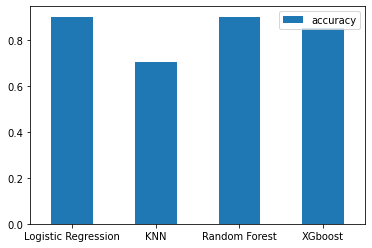

In [177]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation = 0);

### Hyperparameter tuning 

In [178]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors: 
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the trainning scores list 
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    
    test_scores.append(knn.score(X_test,y_test))

In [179]:
train_scores 

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

Maximum KNN score on the test data: 77.05%


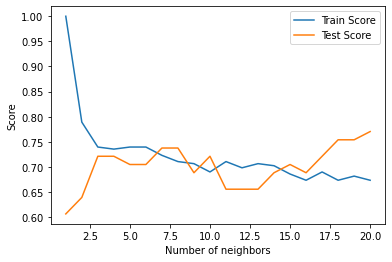

In [180]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label= "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend(["Train Score","Test Score"])

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyper parameter with RandomizedSearchCV

We'll tune the two other models that is 
* LogisticReggression
* RandomForestClassifier
* XGboost

In [181]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Different XGBoost hyperparameters

xb_grid = {'max_depth':range(3,10,2),
          'min_child_weight':range(1,6,2),
          'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)],
           'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [182]:
# Tune LogisticRegression
np.random.seed(52)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperarameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [183]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [184]:
rs_log_reg.score(X_test,y_test)

0.9180327868852459

Now we wil tune RandomForestClassifier 

In [191]:
# Tune RandomForestClassifier
np.random.seed(52)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperarameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [192]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [193]:
rs_rf.score(X_test,y_test)

0.8688524590163934

Now we wil tune XGBoostClassifier


In [194]:
# Tune XGBoostClassifier
np.random.seed(52)

# Setup random hyperparameter search for XGBoostClassifier

rs_xb = RandomizedSearchCV(XGBClassifier(),
                               param_distributions = xb_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperarameter search model for XGBoostClassifier
rs_xb.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [195]:
rs_xb.best_params_

{'subsample': 0.6,
 'reg_alpha': 1,
 'min_child_weight': 1,
 'max_depth': 7,
 'colsample_bytree': 0.7}

In [196]:
rs_xb.score(X_test,y_test)

0.8524590163934426

## HyperParameter tuning with GridSearchCV

Since LogesticRegression have the best accuracy so we will try LogesticRegression with GridSearchCV

### LogisticRegression

In [203]:
np.random.seed(52)

# Hyperparameter to tune 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ['liblinear']}

# Tuning hyperparameter

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# Fit hyperarameter search model for LogisticRegression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [204]:
# Check the best parameter
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [205]:
gs_log_reg.score(X_test,y_test)

0.9180327868852459

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision
* Recall
* F1-score

In [206]:
# Make predictions with tune model
y_preds = gs_log_reg.predict(X_test)

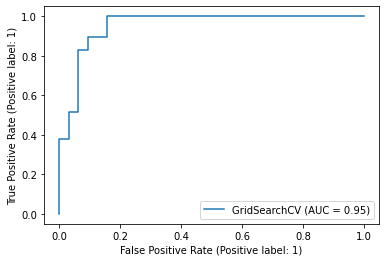

In [213]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [214]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[27  5]
 [ 0 29]]


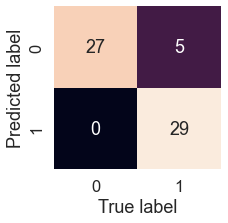

In [218]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    
plot_conf_mat(y_test,y_preds)

Now we will do a classification report 

In [219]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score so we'll using `cross_val_score()` 

In [220]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [224]:
# Create new clf with best parameters
clf = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')

In [227]:
# Cross-valiated accuray
cv_acc = cross_val_score(clf, X, y,cv = 5, scoring = "accuracy")
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [232]:
cv_acc = cv_acc.mean()
cv_acc

0.834808743169399

In [229]:
# Cross-valiated precision
cv_pre = cross_val_score(clf, X, y,cv = 5, scoring = "precision")
cv_pre

array([0.775     , 0.88571429, 0.84848485, 0.85714286, 0.725     ])

In [233]:
cv_pre = cv_pre.mean()
cv_pre

0.8182683982683983

In [234]:
# Cross-valiated recall
cv_recall = cross_val_score(clf, X, y,cv = 5, scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [236]:
cv_recall = cv_recall.mean()
cv_recall

0.9030303030303031

In [238]:
# Cross-valiated f1-score
cv_f1 = cross_val_score(clf, X, y,cv = 5, scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.84848485, 0.88235294, 0.79452055])

In [239]:
cv_f1 = cv_f1.mean()
cv_f1

0.8572876223964057

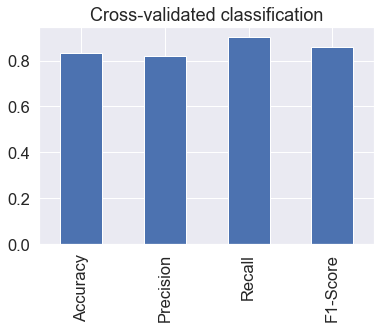

In [248]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_pre,
                           "Recall":cv_recall,
                           "F1-Score":cv_f1
                           },index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification",legend = False);

## Feature Importance 

Feature importance is another as asking, "Which features contribute the most to the outcomes of the model and how did they contribute ? "

In [250]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [251]:
# Check coef_
clf.coef_

array([[ 0.00647008, -0.68304128,  0.6184325 , -0.01307299, -0.00299729,
        -0.01771121,  0.24452429,  0.0243036 , -0.38642002, -0.39287514,
         0.32969957, -0.51228764, -0.48958063]])

In [252]:
# Match coef's features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006470083152490073,
 'sex': -0.6830412760813681,
 'cp': 0.6184324993514808,
 'trestbps': -0.013072986824975933,
 'chol': -0.0029972896176872904,
 'fbs': -0.017711210040283108,
 'restecg': 0.24452428594576928,
 'thalach': 0.024303596917179204,
 'exang': -0.3864200217172968,
 'oldpeak': -0.3928751442438897,
 'slope': 0.32969956799506317,
 'ca': -0.5122876386691393,
 'thal': -0.4895806312598963}

<AxesSubplot:title={'center':'Feature Importance'}>

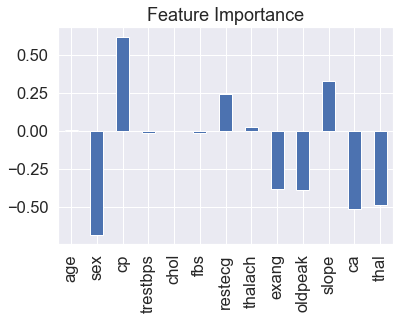

In [254]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False)